## Preparação do ambiente

In [87]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
files.upload()

# Desafio Prático 1: Visualizando Dados Diferentes


Descrição: Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando
Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos
dados, correlações entre variáveis e tendências.<br>
Tarefas:
1. Carregar os dados de um arquivo CSV fornecido (saude.csv).
2. Criar um histograma da variável 'age' usando Matplotlib.
3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando Seaborn.
4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por
'gender' usando Plotly.

## 1. Carregar os dados de um arquivo CSV fornecido (saude.csv)

In [89]:
df_saude = pd.read_csv('/content/saude.csv')
df_saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


In [90]:
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   age     10 non-null     int64 
 2   height  10 non-null     int64 
 3   weight  10 non-null     int64 
 4   gender  10 non-null     object
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


In [91]:
df_saude.describe()

,id,age,height,weight
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,34.800000,167.800000,72.600000
std,3.02765,8.753412,7.857056,11.057426
min,1.00000,23.000000,155.000000,55.000000
25%,3.25000,28.250000,161.250000,65.750000
50%,5.50000,35.000000,169.000000,72.500000
75%,7.75000,39.500000,173.750000,79.500000
max,10.00000,50.000000,180.000000,90.000000


In [92]:
df_saude_dicionario = {'id': 'id',
                       'age': 'idade',
                       'height': 'altura',
                       'weight': 'peso',
                       'gender': 'genero'}
df_saude.rename(columns=df_saude_dicionario, inplace=True)
df_saude.head()

,id,idade,altura,peso,genero
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


## 2. Criar um histograma da variável 'age' usando Matplotlib.

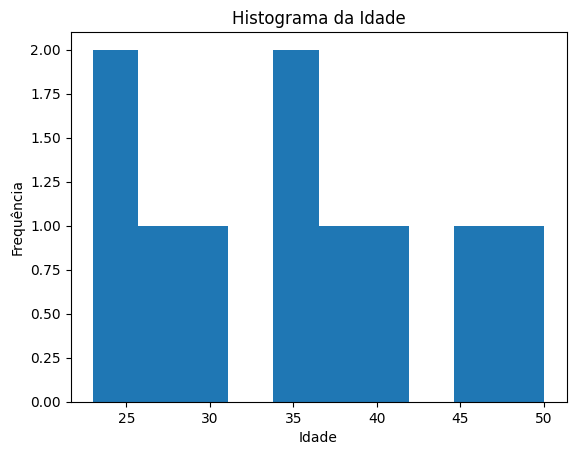

In [93]:
plt.hist(df_saude['idade'], bins=10)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma da Idade')
plt.show()

## 3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando Seaborn.

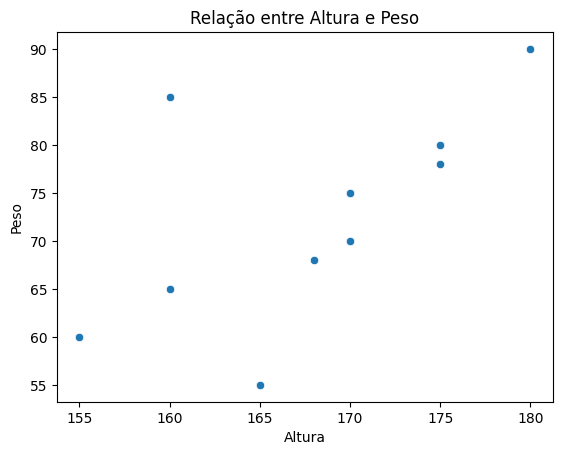

In [94]:
sns.scatterplot(x='altura', y='peso', data=df_saude)
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title('Relação entre Altura e Peso')
plt.show()

## 4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por 'gender' usando Plotly.

In [95]:
fig = px.bar(df_saude.groupby('genero').size().reset_index(name='contagem'), x='genero', y='contagem', title='Contagem de Indivíduos por Gênero')
fig.show()

In [96]:
fig = go.Figure(data=[go.Bar(
    x=df_saude['genero'].value_counts().index,
    y=df_saude['genero'].value_counts().values,
    marker_color='rgb(158,202,225)',
    text=df_saude['genero'].value_counts().values)])

fig.update_layout(title='Contagem de Indivíduos por Gênero', xaxis_title='Gênero', yaxis_title='Contagem')
fig.show()

# Desafio Prático 2: Séries Temporais

Descrição: Neste desafio, suas alunas irão analisar uma série temporal de dados de
vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar
tendências e sazonalidades.<br>
Tarefas:
1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).
2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.
3. Criar um gráfico de decomposição sazonal usando Seaborn.
4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo
do tempo usando Plotly

## 1. Carregar os dados de um arquivo CSV fornecido (vendas.csv)

In [97]:
df_venda = pd.read_csv('/content/vendas.csv')
df_venda.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


In [98]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    31 non-null     object
 1   sales   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [99]:
df_venda.describe()

,sales
count,31.000000
mean,258.387097
std,82.101432
min,100.000000
25%,200.000000
50%,250.000000
75%,325.000000
max,400.000000


In [100]:
df_venda_dicionario = {'date': 'data',
                       'sales': 'vendas'}

df_venda.rename(columns=df_venda_dicionario, inplace=True)
df_venda.head()

,data,vendas
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


In [101]:
df_venda['data'] = pd.to_datetime(df_venda['data'])
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    31 non-null     datetime64[ns]
 1   vendas  31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes


In [102]:
df_venda['data'] = df_venda['data'].dt.strftime('%d/%m/%Y')
df_venda.head()

,data,vendas
0,01/01/2023,100
1,02/01/2023,150
2,03/01/2023,200
3,04/01/2023,130
4,05/01/2023,180


## 2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.


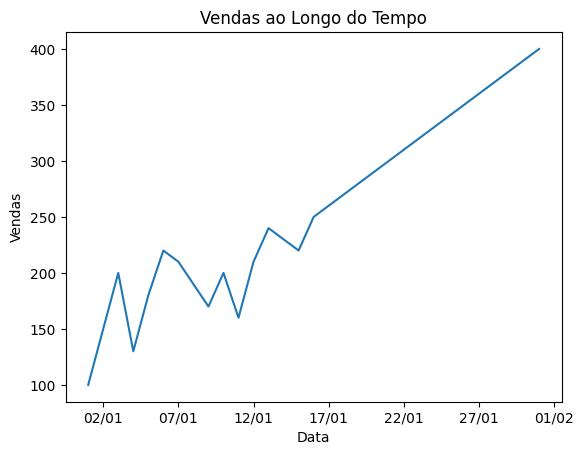

In [103]:
plt.plot(df_venda['data'], df_venda['vendas'])
plt.xlabel('Data')
# Formatando o eixo x para mostrar as datas corretamente
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.ylabel('Vendas')
plt.title('Vendas ao Longo do Tempo')
plt.show()

## 3. Criar um gráfico de decomposição sazonal usando Seaborn.

In [104]:
df_venda.set_index('data', inplace=True)
df_venda.head()

,vendas
data,
01/01/2023,100
02/01/2023,150
03/01/2023,200
04/01/2023,130
05/01/2023,180


In [105]:
decomposicao = seasonal_decompose(df_venda['vendas'], model='additive', period=15) # pelo entendimento precisa-se ter o dobro de obs para fazer a decomposição.

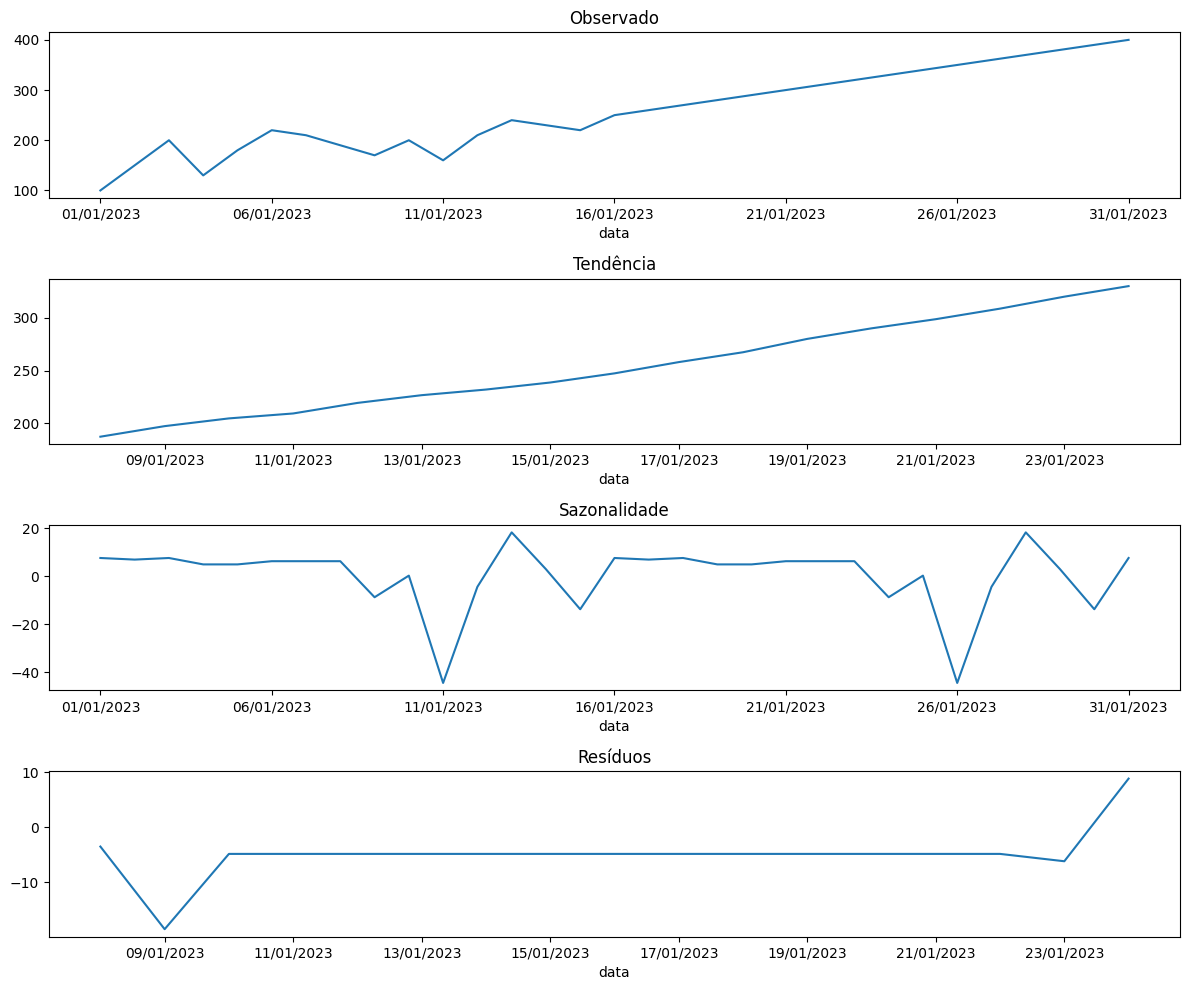

In [106]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposicao.observed.plot(ax=ax1)
ax1.set_title('Observado')
decomposicao.trend.plot(ax=ax2)
ax2.set_title('Tendência')
decomposicao.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')
decomposicao.resid.plot(ax=ax4)
ax4.set_title('Resíduos')
plt.tight_layout()
plt.show()

## 4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly.

In [107]:
df_venda = df_venda.reset_index()

In [108]:
fig = px.line(df_venda, x='data', y='vendas', title='Vendas ao longo do tempo',
              labels={'data': 'Data', 'vendas': 'Quantidade de Vendas'})
fig.update_layout(
    xaxis_title="Data",
    yaxis_title="Vendas",
    hovermode="x unified"
)

fig.show()

## Teste de Estacionariedade

In [109]:
def test_stationarity(timeseries):
  result = adfuller(timeseries)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


test_stationarity(df_venda['vendas'])

ADF Statistic: 0.583363
p-value: 0.987198
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


In [110]:
teste = df_venda['vendas'].shift(1)
teste.head(5)

,vendas
0,NaN
1,100.0
2,150.0
3,200.0
4,130.0


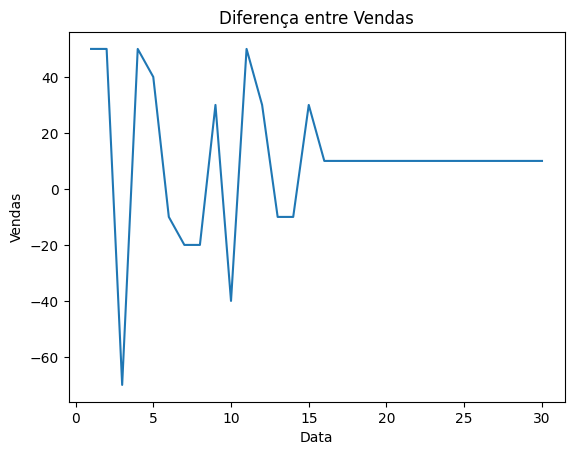

ADF Statistic: -27.474727
p-value: 0.000000
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


In [111]:
df_venda['dif_vendas'] = df_venda['vendas'] - teste
df_venda['dif_vendas'].dropna(inplace=True)
plt.plot(df_venda['dif_vendas'])
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Diferença entre Vendas')
plt.show()

# teste de estacionariedade
test_stationarity(df_venda['dif_vendas'].dropna())

A série agora é estacionária agora porque, ADF está negativo. P-valor é menor que 5% e as faixas são menores que os valores delas, faixa de 1% é negativa, menor que 1%.